# Function Transformer

[Learn More on QQPlot](httpms://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

Log Transformer:
    We take log of every values in the columns. 
    
When to use:
1.NOT when there are Negative Values
2.Apply it mostly on Right Skewed Data. Data to the right tends to comes to the middle. (Log generally lowers the high values and improves the performance of linear models)

Reciprocal Transformer:
    When we take this, smaller values get big and bigger values get saller

Square transformer:
    Take square of the values in the columns.

When to use:
1. Apply only on Left skewed data    

In [98]:
# Importing Libraries

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [99]:
import os
os.chdir('/Users/arnabmaji/Documents/Documents/CSV Raw Data')
os.getcwd()

'/Users/arnabmaji/Documents/Documents/CSV Raw Data'

In [100]:
# Readind csv file and selecting required columns
titanic_df = pd.read_csv("Titanic.csv", usecols= ["Age","Fare","Survived"])

In [101]:
titanic_df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [102]:
# Replacing nulls in Age by mean of Age columns
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)

In [103]:
titanic_df.sample(5)

,Survived,Age,Fare
849,1,29.699118,89.1042
195,1,58.000000,146.5208
615,1,24.000000,65.0000
786,1,18.000000,7.4958
429,1,32.000000,8.0500


In [104]:
X = titanic_df.iloc[:,1:3]
y = titanic_df.iloc[:,0]

In [105]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis = 1),titanic_df[['Survived']],test_size = 0.2, random_state = 1)

In [106]:
# Checking shape of train and test data
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712, 1), (179, 1))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_6101/362711763.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


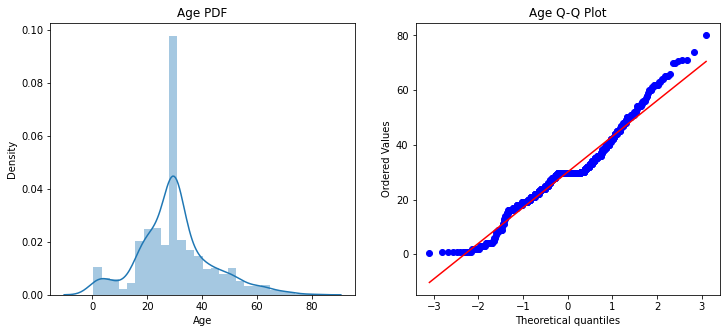

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
sns.distplot(X_train['Age'], ax = ax1)
ax1.set_title("Age PDF")
stats.probplot(X_train['Age'], dist = 'norm', plot = ax2)
ax2.set_title("Age Q-Q Plot")


fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_6101/687909462.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


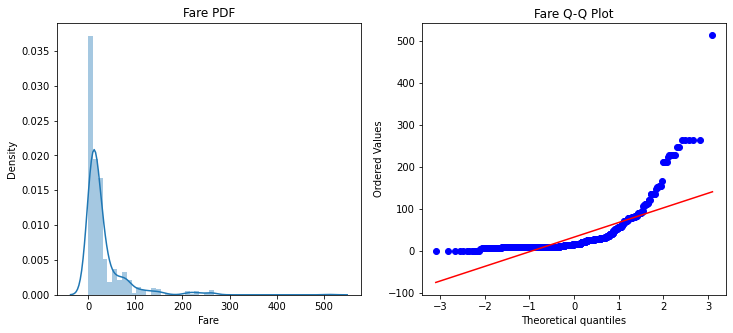

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
sns.distplot(X_train['Fare'], ax = ax1)
ax1.set_title("Fare PDF")
stats.probplot(X_train['Fare'], dist = 'norm', plot = ax2)
ax2.set_title("Fare Q-Q Plot")


fig.show()

In [109]:
# Applying Logistic Regression
lr1 = LogisticRegression()
dtc1 = DecisionTreeClassifier()

In [110]:
lr1.fit(X_train, y_train)
dtc1.fit(X_train, y_train)

logistic_reg_result_untreated = lr1.predict(X_test)
decision_tree_result_untreated = dtc1.predict(X_test)

print("Accuracy of Logistic Reg Untreated", accuracy_score(y_test,logistic_reg_result_untreated))
print("Accuracy of Decision Tree Untreated", accuracy_score(y_test,decision_tree_result_untreated))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Logistic Reg Untreated 0.6033519553072626
Accuracy of Decision Tree Untreated 0.6145251396648045


We see that both Logistic Regression and Decision Tree have pretty low accuracy.

We would now be starting with Log Transformation for "Fare" column, as it is right skewed.
Why do we apply np.log1p? instead of np.log:
Because log creates problem with 0s, as Log 0 = 1, np.log1p adds 1 to every value before applying log, hence 

In [111]:
ft_log = FunctionTransformer(func = np.log1p)

In [112]:
X_train_log_transformed = ft_log.fit_transform(X_train)
X_test_log_transformed = ft_log.transform(X_test)

In [113]:
# Applying Logistic Regression
lr2 = LogisticRegression()
dtc2 = DecisionTreeClassifier()

In [114]:
lr2.fit(X_train_log_transformed, y_train)
dtc2.fit(X_train_log_transformed, y_train)

logistic_reg_result_log_treated = lr2.predict(X_test_log_transformed)
decision_tree_result_log_treated = dtc2.predict(X_test_log_transformed)

print("Accuracy of Logistic Reg Log Treated", accuracy_score(y_test,logistic_reg_result_log_treated))
print("Accuracy of Decision Tree Log Treated", accuracy_score(y_test,decision_tree_result_log_treated))

Accuracy of Logistic Reg Log Treated 0.6368715083798883
Accuracy of Decision Tree Log Treated 0.6368715083798883


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


As it can be seen, there is no difference in the accuracy of the decision tree model, but there is a significant
increase in the accuracy of logistic regression model.

In [116]:
# Trying cross validation score to re-check the accuracy
print("Accuracy of Logistic Reg Log Treated Cross Validated:", np.mean(cross_val_score(lr2,y_test,logistic_reg_result_log_treated, scoring = "accuracy", cv = 10)))
print("Accuracy of Decision Tree Log Treated Cross Validated:", np.mean(cross_val_score(dtc2,y_test,decision_tree_result_log_treated, scoring = "accuracy",cv = 10)))

Accuracy of Logistic Reg Log Treated Cross Validated: 0.7431372549019608
Accuracy of Decision Tree Log Treated Cross Validated: 0.6983660130718954


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_6101/124472518.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

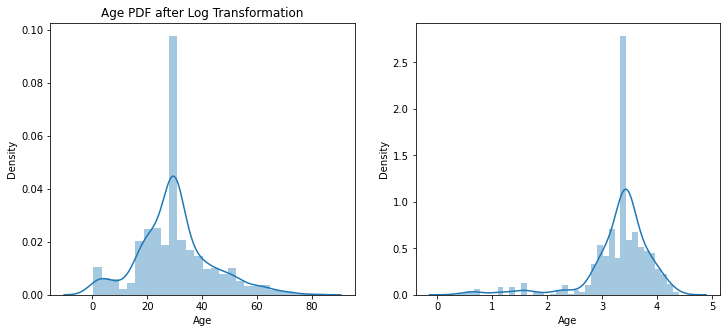

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
sns.distplot(X_train['Age'], ax = ax1)
ax1.set_title("Age PDF before Log Transformation")
sns.distplot(X_train_log_transformed['Age'], ax = ax2)
ax1.set_title("Age PDF after Log Transformation")


fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_6101/1762553466.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure

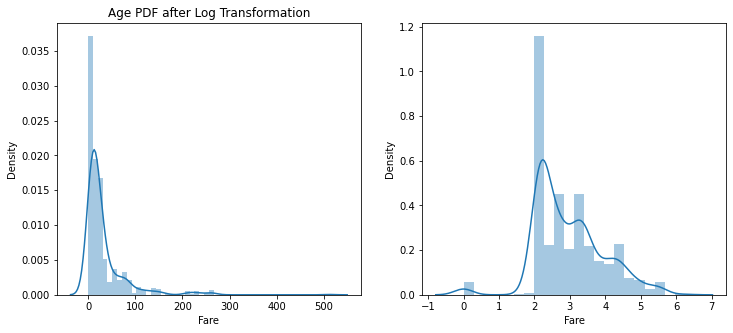

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
sns.distplot(X_train['Fare'], ax = ax1)
ax1.set_title("Age PDF before Log Transformation")
sns.distplot(X_train_log_transformed['Fare'], ax = ax2)
ax1.set_title("Age PDF after Log Transformation")


fig.show()

As you can see below: the Q-Q plot for Age column is much more aligned to the 45 degree line.

/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_6101/3209151356.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


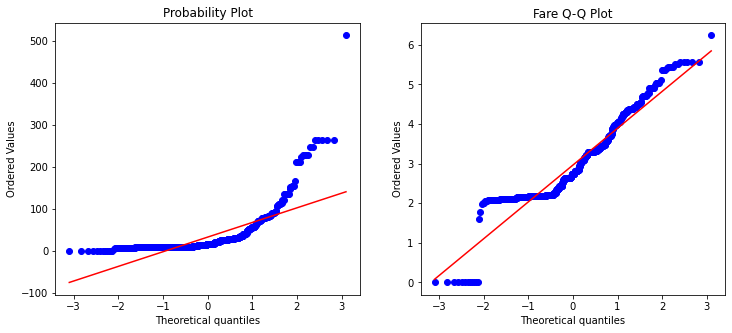

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
stats.probplot(X_train['Fare'], dist = 'norm', plot = ax1)
ax2.set_title("Fare Q-Q Plot")
stats.probplot(X_train_log_transformed['Fare'], dist = 'norm', plot = ax2)
ax2.set_title("Fare Q-Q Plot")


fig.show()

But Log Trabsformation seems to be negatively affecting Age

/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_6101/3554021636.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


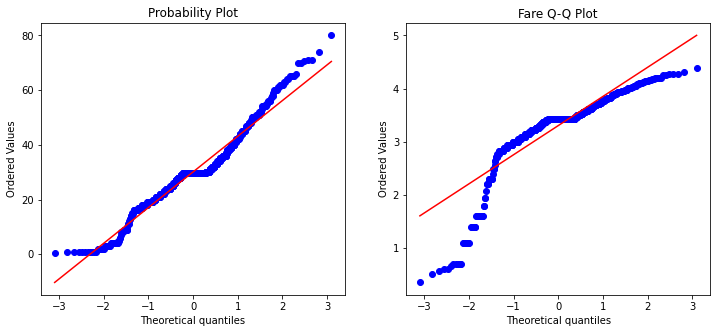

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
stats.probplot(X_train['Age'], dist = 'norm', plot = ax1)
ax2.set_title("Fare Q-Q Plot")
stats.probplot(X_train_log_transformed['Age'], dist = 'norm', plot = ax2)
ax2.set_title("Fare Q-Q Plot")


fig.show()

So, instead of applying log transformation on both Fare and Age columns, let's apply it only on Fare. Using it via column transformer instead of coding it repeatedly

In [122]:
log_transformer_fare = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])], remainder="passthrough")

In [123]:
X_train_log_transformed_fare = log_transformer_fare.fit_transform(X_train)
X_test_log_transformed_fare = log_transformer_fare.transform(X_test)

In [124]:
# Applying Logistic Regression
lr3 = LogisticRegression()
dtc3 = DecisionTreeClassifier()

In [125]:
lr2.fit(X_train_log_transformed_fare, y_train)
dtc2.fit(X_train_log_transformed_fare, y_train)

logistic_reg_result_log_treated_fare = lr2.predict(X_test_log_transformed_fare)
decision_tree_result_log_treated_fare = dtc2.predict(X_test_log_transformed_fare)

print("Accuracy of Logistic Reg Log Treated Fare", accuracy_score(y_test,logistic_reg_result_log_treated_fare))
print("Accuracy of Decision Tree Log Treated Fare", accuracy_score(y_test,decision_tree_result_log_treated_fare))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Logistic Reg Log Treated Fare 0.6368715083798883
Accuracy of Decision Tree Log Treated Fare 0.6201117318435754


You can pick another data and try applying similar transformations and see how are the results getting displayed